#Probabilistic ML models

Topics:
1. Convolutional Operation
2. CNN and Using Learnt Representations
3. CNN Visualization

## 1. Convolutional Operations

Central to Convolutional Neural Networks (CNN), a convolution operation is a linear operation which involves element-wise multiplication between a small filter (say, a matrix of integers) and filter-sized patch from the image. We move this filter across the image like a sliding window from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. These filters can do simplest task like checking if there is a vertical line in the image or complicated task like detecting a human eye in the image.

Let's look at the convolution formula:

Convolution between image $f(x, y)$ and kernel $k(x, y)$ is
$$f(x,y) * k(x,y) = \sum \limits _{i=0} ^{W-1} \sum \limits _{j=0} ^{H-1} f(i, j) k(x − i, y − j)$$

where $W$ and $H$ are the the width and height of the image.

<img src="https://www.researchgate.net/profile/Chaim-Baskin/publication/318849314/figure/fig1/AS:614287726870532@1523469015098/Image-convolution-with-an-input-image-of-size-7-7-and-a-filter-kernel-of-size-3-3.png" alt="Convolution" width=650px height=280px/>


Image reference: [Streaming Architecture for Large-Scale Quantized Neural Networks on an FPGA-Based Dataflow Platform](https://www.researchgate.net/publication/318849314_Streaming_Architecture_for_Large-Scale_Quantized_Neural_Networks_on_an_FPGA-Based_Dataflow_Platform/figures?lo=1)

The code demonstrates the convolution operation of a 2D matrix (image) with various filters

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

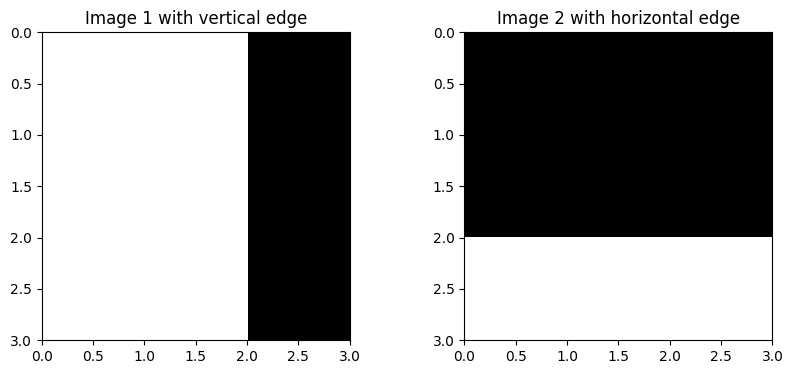

In [2]:
# 2D 3x3 binary image with vertical edge
image1 = np.array([[1,1,0],
                   [1,1,0],
                   [1,1,0]])

# 2D 3x3 binary image with horizontal edge
image2 = np.array([[0,0,0],
                   [0,0,0],
                   [1,1,1]])

# print(image1*255)
# Let's plot the images
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
# plt.ylim(0, 3)
ax.set_title('Image 1 with vertical edge')

ax = fig.add_subplot(1,2,2)
ax.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
ax.set_title('Image 2 with horizontal edge')
plt.show()

Let's create a 3x3 vertical edge filter. We will 'convolve' this filter over the images to detect vertical edge. As the image is same size as of filter, this is simple element-wise multiplication and summing up the result into single value.

In [3]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

In [4]:
# Applying filter to first image
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

# Applying filter to second image
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


Non-zero output suggests that there is a vertical edge present in the first image and not present in the second image.
Now, let's create a horizontal edge filter and apply it to both the above images.

In [5]:
# Horizontal edge filter
filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


As expected, the horizontal edge is detected in second image with this filter.

Now, we will take a bigger image (5 x 5) and see how a convolution operation works by sliding a filter left to right and top to bottom to obtain an output map from image. Let's define a function ***apply_filter()*** for this.

In [6]:
filter.shape

(3, 3)

In [7]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)

  # Move the filter over entire image and store the result in output
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      # Matrix multiplication for a single patch of image and filter
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

  # Calculate the output shape of the resultant image
  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  # Return the reshaped image
  return output.reshape(output_shape)

Plotting function

In [12]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

In [16]:
# 2D image
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])


output = apply_filter(img, filter)
print(output) # Note the shape of output image!

[[60. 60.  0.]
 [60. 60.  0.]
 [60. 60.  0.]]


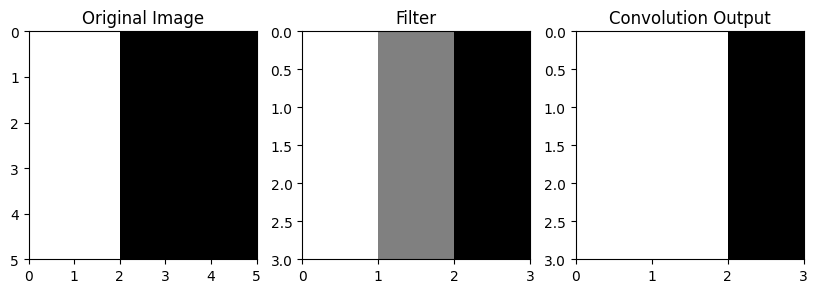

In [14]:
# Let's plot the above image with results
images = []
titles = []

images.append(img)
titles.append('Original Image')

images.append(filter)
titles.append('Filter')

images.append(output)
titles.append('Convolution Output')

plot_images(images, titles)

As, you can see, horizontal edge is detected in the output.

Now, we will see the effect of applying this filter on a grayscale image. Again, for this, we need to 'convolve' the filter over the entire image.
We will use the same filter and function defined earlier.

In [11]:
# Get the sample image
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0  0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   1876      0  0:00:01  0:00:01 --:--:--     0


Original image size:  (99, 100)
Output image size:  (97, 98)


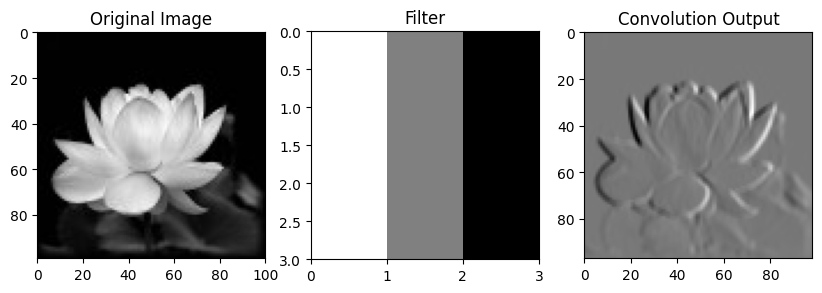

In [18]:
# Read the image with opencv, 0 stands for 'grayscale'
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')
# print(images)
# print(titles)

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

### Exercise
1. Try padding in convolution on lotus.jpg and show results
2. Try stride  in convolution on lotus.jpg and show results

1 Answer

In [20]:
import numpy as np


def apply_filter_with_padding(img, filter, padding='valid'):
    height, width = img.shape
    filter_size = filter.shape

    # Calculate the padding required
    if padding == 'same':
        pad_height = ((filter_size[1] - 1) // 2, filter_size[1] // 2)
        pad_width = ((filter_size[0] - 1) // 2, filter_size[0] // 2)
    elif padding == 'valid':
        pad_height = pad_width = (0, 0)
    else:
        raise ValueError("Invalid padding type. Use 'valid' or 'same'.")

    # Apply padding to the image
    img_padded = np.pad(img, ((pad_height[0], pad_height[1]), (pad_width[0], pad_width[1])), mode='constant')

    output = np.empty(0)

    for i in range(0, height + pad_height[0] + pad_height[1] - filter_size[1] + 1):
        for j in range(0, width + pad_width[0] + pad_width[1] - filter_size[0] + 1):
            output = np.append(output, np.sum(np.multiply(img_padded[i:i+filter_size[0], j:j+filter_size[1]], filter)))

    output_shape = (height + pad_height[0] + pad_height[1] - (filter_size[1]-1)), \
                   (width + pad_width[0] + pad_width[1] - (filter_size[0]-1))

    return output.reshape(output_shape)

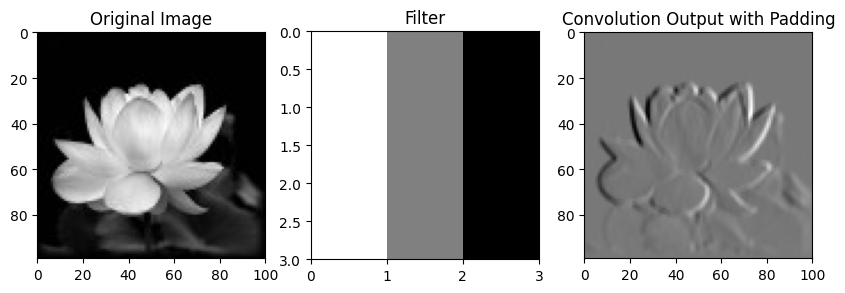

In [21]:

# Example usage with padding
img = cv2.imread('lotus.jpg', 0)


filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

output_padded = apply_filter_with_padding(img, filter, padding='same')

# Plot the images with padding
images_padded = [img, filter, output_padded]
titles_padded = ['Original Image', 'Filter', 'Convolution Output with Padding']
plot_images(images_padded, titles_padded)


2 Answer

In [22]:
import numpy as np

def apply_filter_with_stride(img, filter, stride=1):
    height, width = img.shape
    filter_size = filter.shape

    output = np.empty(0)

    for i in range(0, height - filter_size[1] + 1, stride):
        for j in range(0, width - filter_size[0] + 1, stride):
            output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

    output_shape = ((height - (filter_size[1]-1)) // stride), \
                   ((width - (filter_size[0]-1)) // stride)

    return output.reshape(output_shape)


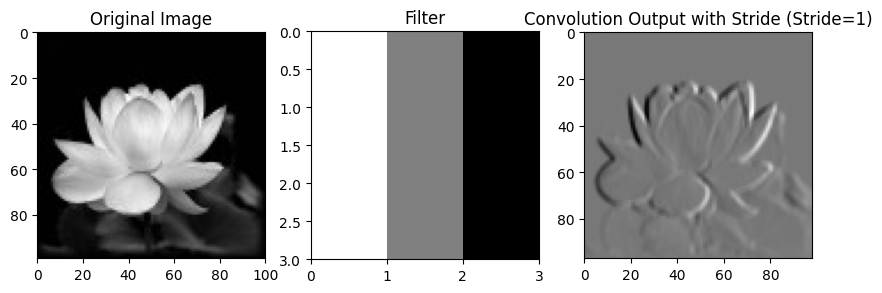

In [28]:
# Example usage with stride
img = cv2.imread('lotus.jpg',0)

filter = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

stride_value = 1
output_strided = apply_filter_with_stride(img, filter, stride=stride_value)

# Plot the images with stride
images_strided = [img, filter, output_strided]
titles_strided = ['Original Image', 'Filter', f'Convolution Output with Stride (Stride={stride_value})']
plot_images(images_strided, titles_strided)

## 2. CNN and Using Learnt Representations

Now lets implement a CNN in pytorch and use the learnt representations for image classification of MNIST dataset.

<img src='https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png' />

Image reference: https://miro.medium.com/max/1872/1*SGPGG7oeSvVlV5sOSQ2iZw.png

We will be implementing a CNN model which can predict the digit, given a grayscale image. The architecture of model is given in the above image.

**We will do the following steps in order:**
1.   Load and visualize MNIST training and test datasets using torchvision
2.   Define the CNN model
3.   Define a loss function and optimizer
4.   Train the network on the training data
5.   Evaluate the network on the test data

In [29]:
# Import packages
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np


In [30]:
# Device configuration (whether to run on GPU or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [31]:
# Set seeds for reproducibility
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

#### Load MNIST data
We will use the [MNIST dataset](https://pytorch.org/vision/stable/datasets.html#mnist) from torchvision Pytorch and setup the train and test dataloaders.

In [32]:
batch_size_train = 128
batch_size_test = 128

# Images in torchvision datasets are PIL Images in range [0,1] so we need
# 'ToTensor' transform to convert them into tensors
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

100%|██████████| 9912422/9912422 [00:02<00:00, 3400449.21it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 19819321.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2265245.33it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13093146.92it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#### Understand the dataset
Let us now visualize the dataset in terms of number of samples, classes etc.

In [33]:
print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [34]:
# Helper function to plot data
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

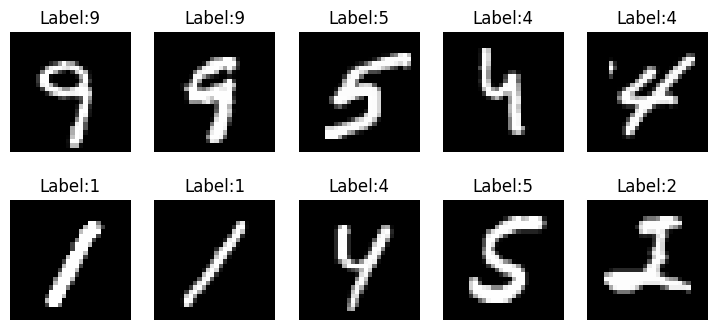

In [35]:
plot_data(train_data.data, train_data.targets.numpy())

#### Define the model

In [36]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layer
        self.fc = nn.Linear(64 * 7 * 7, 128)
        # output layer 10 classes
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x) #activation
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        # flatten the output for FC layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        output = self.out(x)
        return output

In [37]:
# Build the model object and put on the device
model = CNN().to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


#### Define Loss function

In [38]:
# Cross Entropy loss for multi-class classification
loss_func = nn.CrossEntropyLoss()

#### Define optimizer

In [39]:
# Basic SGD optimizer with 0.01 learning rate
optimizer = optim.SGD(model.parameters(), lr = 0.01)

#### Train the model

Helper function for training/testing

In [45]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [46]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc*100))

  # Plot the images with predicted labels
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

Start training

In [47]:
num_epochs = 10  # iterations
train_losses, train_acc = train(num_epochs, model, train_loader, loss_func, optimizer)

Epoch 1/10, Loss: 0.0007, Accuracy: 97.2167
Epoch 2/10, Loss: 0.0007, Accuracy: 97.3417
Epoch 3/10, Loss: 0.0007, Accuracy: 97.4750
Epoch 4/10, Loss: 0.0006, Accuracy: 97.6083
Epoch 5/10, Loss: 0.0006, Accuracy: 97.7650
Epoch 6/10, Loss: 0.0006, Accuracy: 97.8083
Epoch 7/10, Loss: 0.0006, Accuracy: 97.9400
Epoch 8/10, Loss: 0.0005, Accuracy: 97.9983
Epoch 9/10, Loss: 0.0005, Accuracy: 98.0583
Epoch 10/10, Loss: 0.0005, Accuracy: 98.1383


Plot training plots

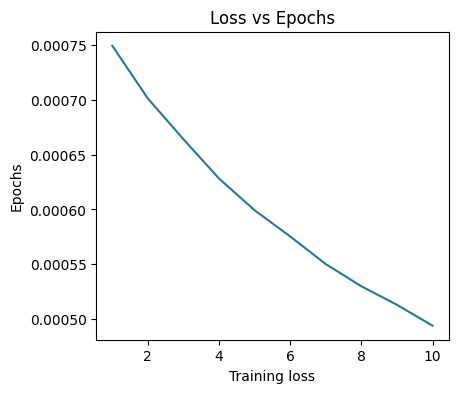

In [48]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
plt.show()

#### Evaluate the model

Test Accuracy: 98.3100


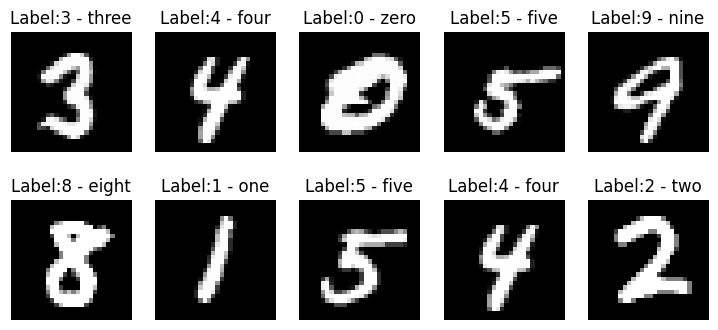

In [49]:
# Evaluate the model on testing data and plot predictions
test(model, test_loader)

### Exercises

Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

1. Single 5x5 Kernel:

-> For a single 5x5 kernel, there are 5 * 5 * C parameters for each channel.

-> Since there are C output channels, the total number of parameters is 5 * 5 * C * C.

2. Equivalent Stacked 3x3 Kernels:

-> For stacked 3x3 kernels, we will use n such kernels in sequence.

-> For the first 3x3 kernel, there are 3 * 3 * C parameters for each channel.

-> For subsequent 3x3 kernels, there are 3 * 3 * C parameters for each channel, but we don't need to consider the number of input channels since they are shared with the previous layer.

Therefore, the total number of parameters for n 3x3 kernels is 3 * 3 * C * (1 + (n-1)).


>5×5×C×C=3×3×C×(1+(n−1))

>5×5×C×C=3×3×C×n

>n= 3×3/5×5 = 25/9
​	
 

So, approximately  n≈2.78
n≈2.78. This suggests that using around 3 stacked 3x3 kernels would have a similar number of parameters as a single 5x5 kernel. However, since the number of parameters must be an integer, in practice, you would use 3 stacked 3x3 kernels

Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

To replace a 7 x 7 convolution kernel with 3 x 3 kernels, you can use a technique called "convolution decomposition." This technique decomposes a large convolution kernel into smaller, more manageable kernels. In this case, you can decompose the 7 x 7 kernel into three 3 x 3 kernels.

The number of parameters in a 7 x 7 kernel is given by (7 x 7 x C x C), where C is the number of channels in the input and output. For the three 3 x 3 kernels, the number of parameters is given by (3 x 3 x C x C) x 3. Therefore, the ratio of parameters is:

(3 x 3 x C x C x 3) / (7 x 7 x C x C) = 27 / 49 ≈ 0.55

This means that using three 3 x 3 kernels instead of a single 7 x 7 kernel reduces the number of parameters by about 45%. This can help reduce overfitting and improve the generalization performance of the model.

## 3. CNN Visualization

Save the conv layers and their weights

In [50]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the conv layers in this list
# get all the model children as list
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [51]:
# take a look at the conv layers and the respective weights
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 1, 3, 3])
CONV: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 32, 3, 3])


### Visualize the CONV layer filters

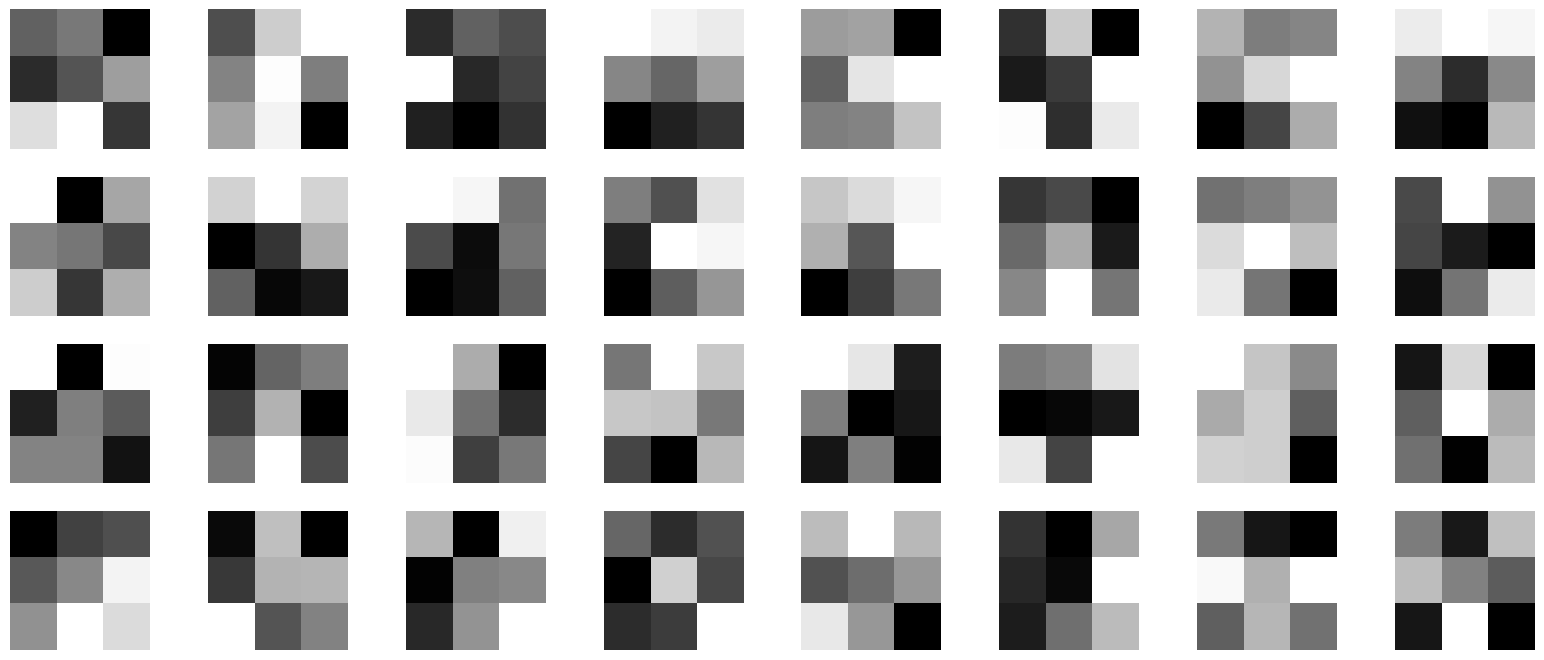

In [52]:
# Visualize the conv layer filters
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8)
    plt.imshow(filter[0, :, :].data.cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

### Visualize filter outputs on an image
Get an image from test dataset

2
5
8
1
2
8
6
5
1
6
5
2
6
4
9
6
9
8
3
2
8
5
0
3
1
2
7
1
7
7
4
7
3
7


/var/folders/5q/05l5lt512wb211kc70mkqccw0000gn/T/ipykernel_29515/1557531871.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3, 3))


0
4
4
8
7
7
7
0
9
0
5
2
1
7
8
4
9
4
8
2
1
7
4
8
4
8
6
5
4
8
4
7
1
4
9
7
4
9
3
1
4
0
5
8
2


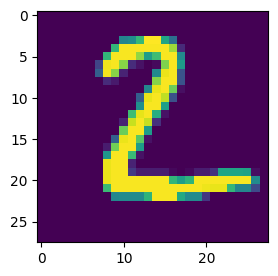

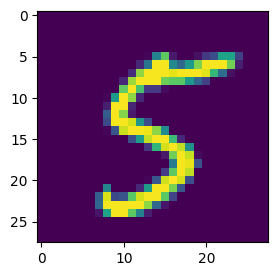

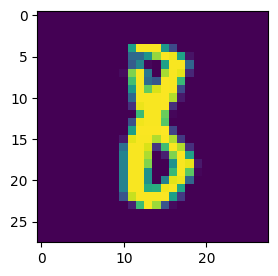

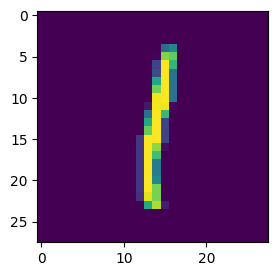

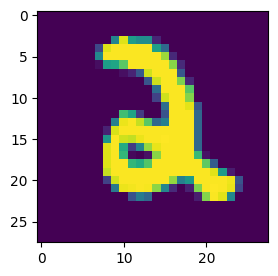

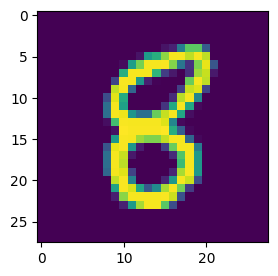

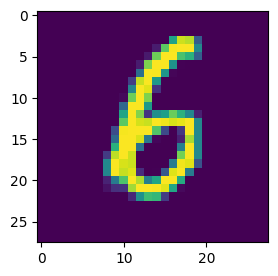

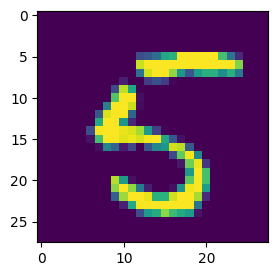

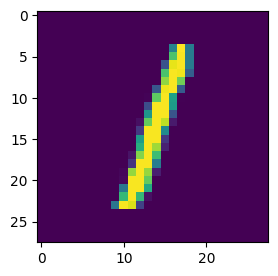

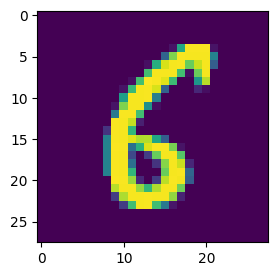

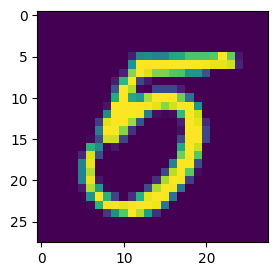

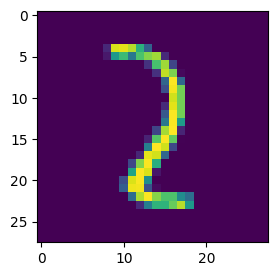

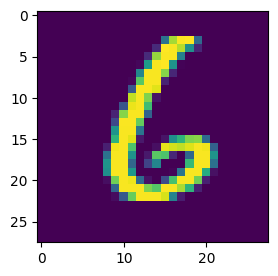

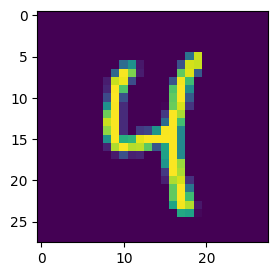

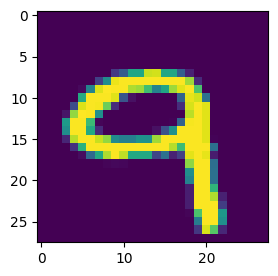

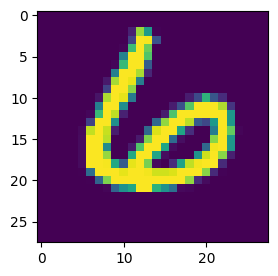

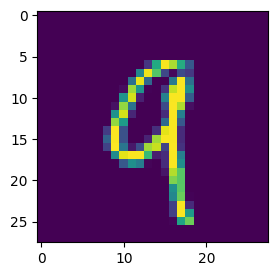

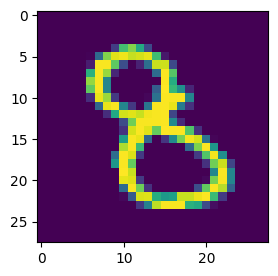

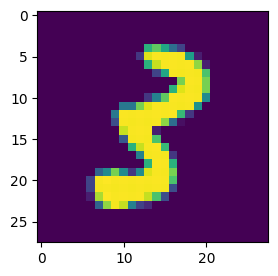

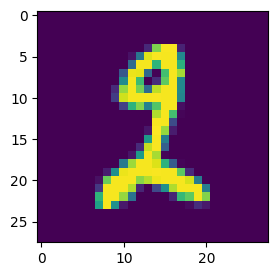

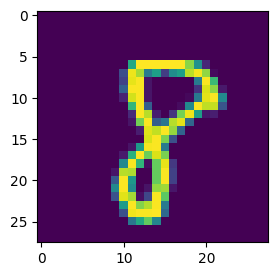

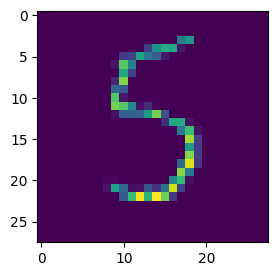

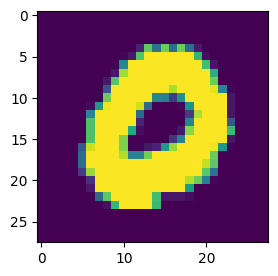

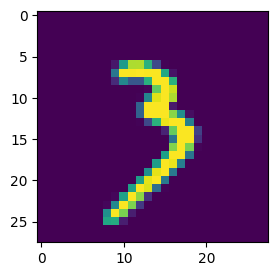

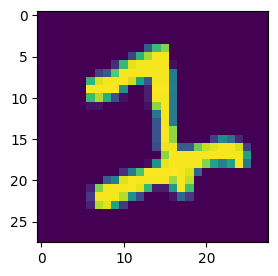

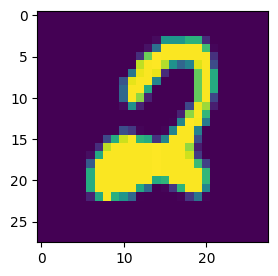

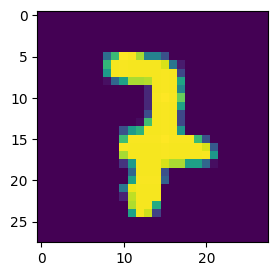

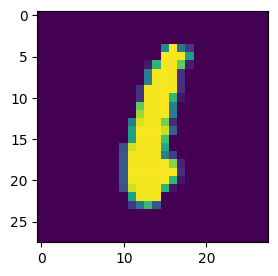

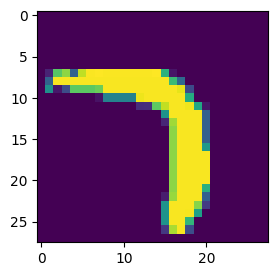

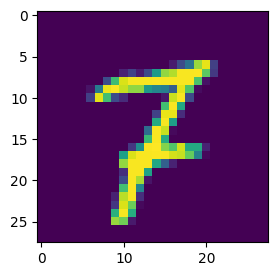

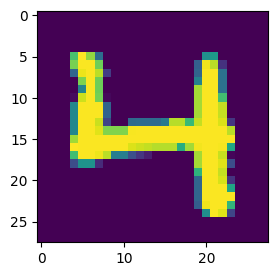

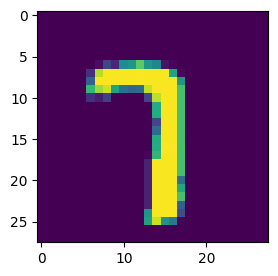

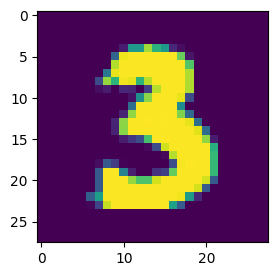

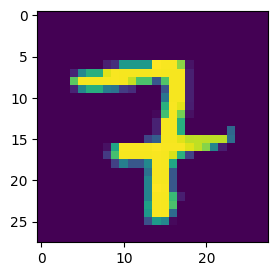

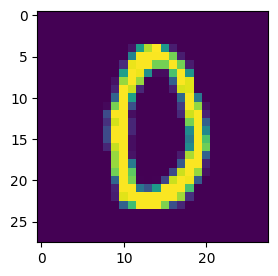

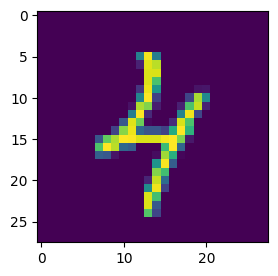

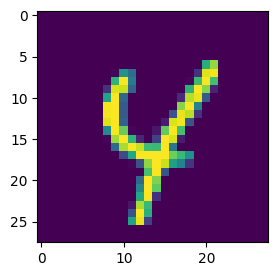

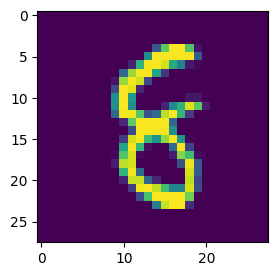

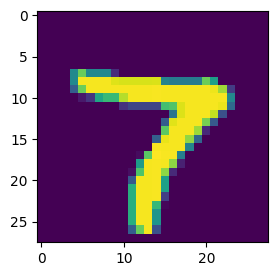

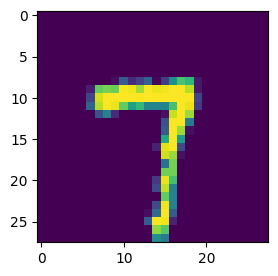

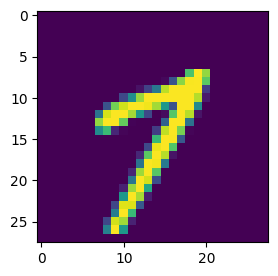

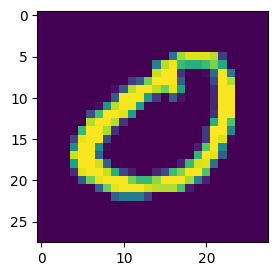

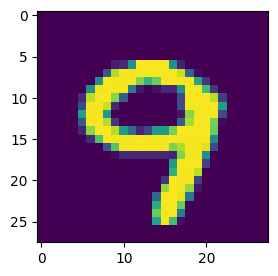

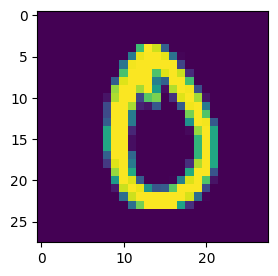

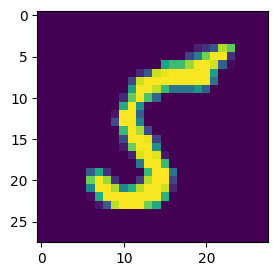

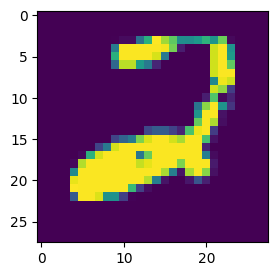

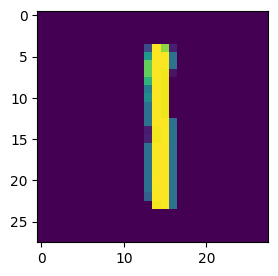

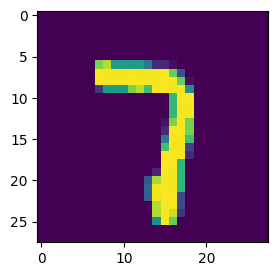

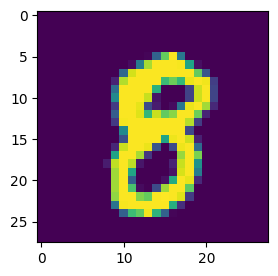

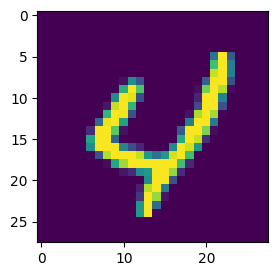

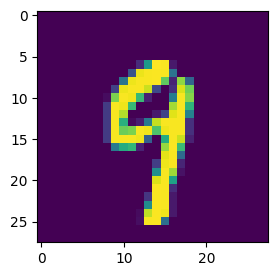

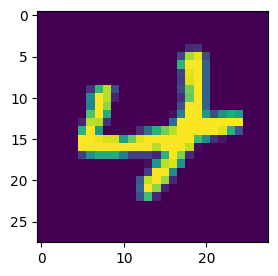

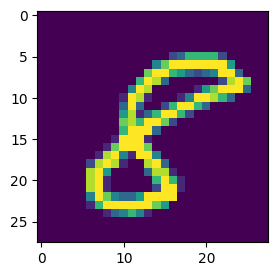

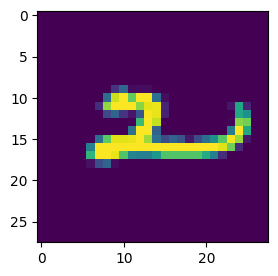

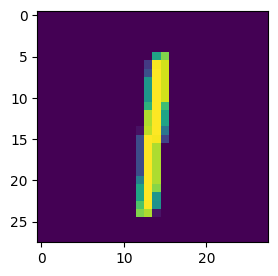

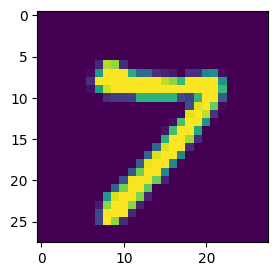

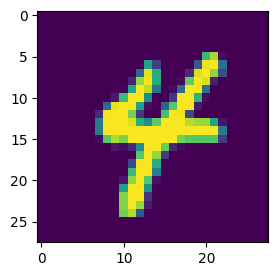

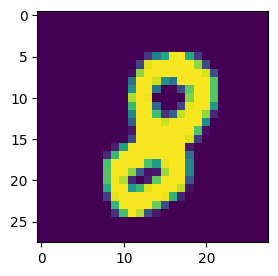

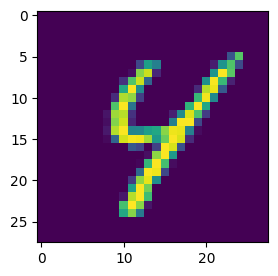

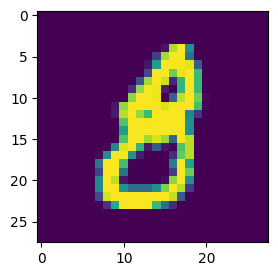

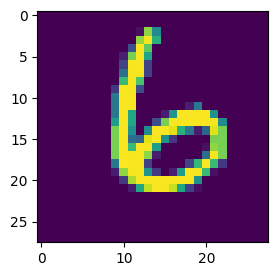

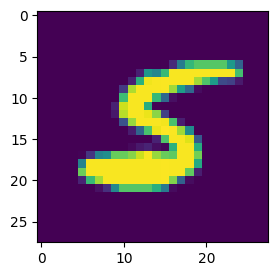

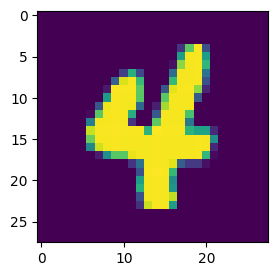

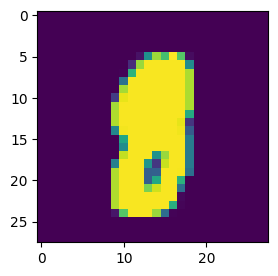

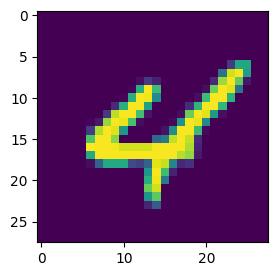

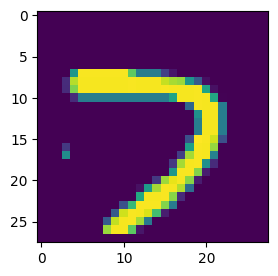

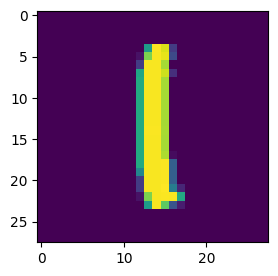

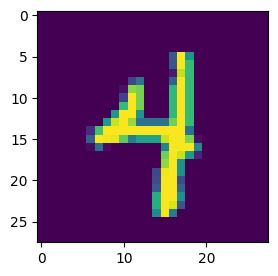

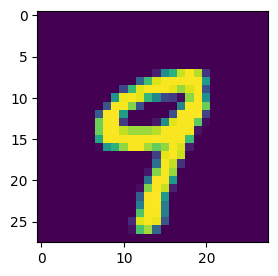

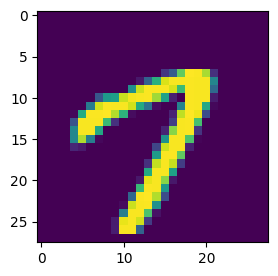

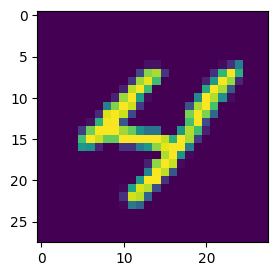

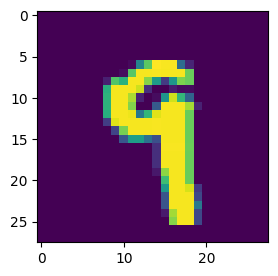

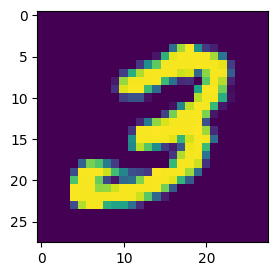

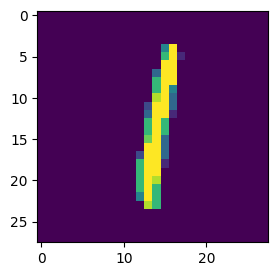

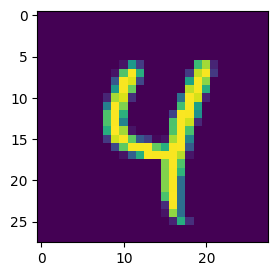

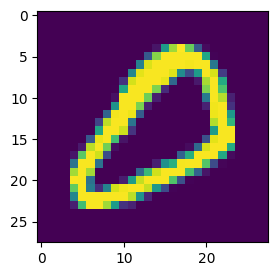

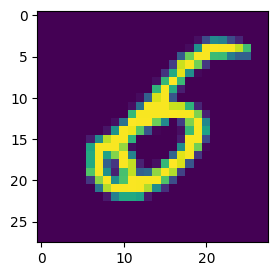

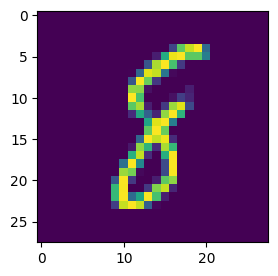

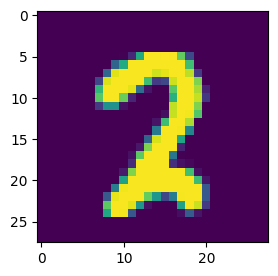

In [53]:
dataiter = iter(test_loader)
for images, labels in dataiter:
    img = images[1]
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(img.reshape((28, 28)))
    print(classes[labels[1].item()])

Forward pass the image through saved conv layers

In [54]:
results = [conv_layers[0](img.to(device))]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

Visualize features from each layer

Layer output size: torch.Size([32, 28, 28])
Layer 0 feature maps...


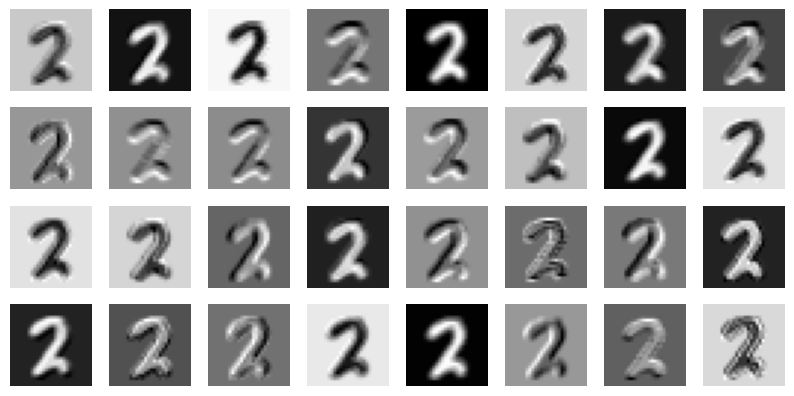

Layer output size: torch.Size([64, 28, 28])
Layer 1 feature maps...


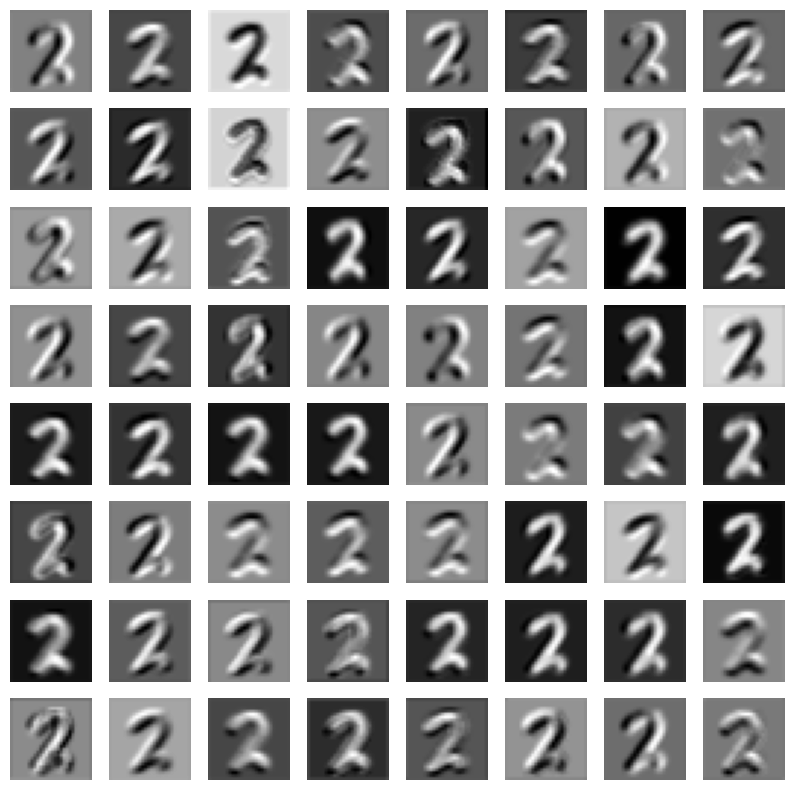

In [55]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(10, 10))
    layer_viz = outputs[num_layer][:, :, :]
    layer_viz = layer_viz.data
    print('Layer output size:', layer_viz.size())
    for i, filter in enumerate(layer_viz):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu().numpy(), cmap='gray')
        plt.axis("off")
    print(f"Layer {num_layer} feature maps...")
    plt.show()
    plt.close()

### Exercises

Q: List a few practical applications of convolutional autoencoders.

Convolutional Autoencoders (CAEs) find applications in various domains due to their ability to learn compact representations of input data through unsupervised learning. Here are a few practical applications:

1. <bold>Image Compression:</bold>
CAEs can be used for image compression by training on a dataset of images and learning a compressed representation. This is useful for reducing storage requirements while preserving essential features.

2. Image Denoising:
CAEs can be employed for image denoising by training the model to reconstruct clean images from noisy ones. The network learns to capture essential features while removing unwanted noise.

3. Anomaly Detection:
CAEs can be used for anomaly detection in images. By training on a dataset of normal images, the model learns to reconstruct them accurately. Anomalies can be detected by observing higher reconstruction errors for unusual inputs.

4. Feature Learning for Image Classification:
CAEs can serve as a feature learning component for image classification tasks. The encoder part of the CAE can be used to extract meaningful features from images, which can then be fed into a classifier.

5. Super-Resolution Imaging:
CAEs can be applied to super-resolution tasks, where the model learns to generate high-resolution images from lower-resolution inputs. This is beneficial in scenarios where enhancing image details is crucial.

6. Medical Image Analysis:
CAEs find applications in medical image analysis for tasks such as segmentation, registration, and reconstruction. They can help in learning hierarchical representations of medical images.

7. Generative Modeling and Image Synthesis:
CAEs can be used for generative modeling, generating new images that share similar characteristics with the training dataset. This is particularly popular in the context of creating realistic synthetic data.

8. Video Analysis:
CAEs can be applied to video frames for tasks such as video compression, denoising, and anomaly detection in dynamic scenes.


Q: What change do we need to make for the autoencoder to reduce into PCA?

To make an autoencoder reduce into PCA, we need to enforce the orthogonality constraint on the weight matrices in the autoencoder. This can be done by adding a regularization term to the loss function that penalizes the difference between the weight matrices and their transposes conjugates. This will ensure that the weight matrices are orthogonal and that the autoencoder learns a low-dimensional representation of the input data that is similar to PCA. Additionally, we can initialize the weight matrices with the principal components of the input data to further encourage the autoencoder to learn a PCA-like representation.

## References and Additional Resources:

*   [Training a classifier tutorial - Pytorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#training-an-image-classifier)
*   [Visualizing Filters and Feature Maps in Convolutional Neural Networks using PyTorch](https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/)
*   [ConvNetJS CIFAR10 Demo](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)


